In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests
import tweepy 
import json

# Gathering data

1) twiiter archive file 

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2) Tweet image prediction



In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

respone = requests.get(url)
file_name = 'image-predictions.tsv'

if not os.path.isfile(file_name):
    with open('file_name', mode ='wb') as file:
        file.write(respone.content)

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3) API & JSON

- i searched for this part and i found it on stack overflow https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [4]:
consumer_key = '***************************'
consumer_secret = '***************************'
access_token = '***************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
tweet_find = []
tweet_not_find = []

for tweet in twitter_archive['tweet_id']:
    try:
        tweet_find.append(api.get_status(tweet))
    except Exception as e:
        tweet_not_find.append(tweet)


Rate limit reached. Sleeping for: 15


In [ ]:
print('tweets founded : ', len(tweet_find))
print('tweets not founded : ', len(tweet_not_find))

In [4]:
list_of_dicts = []
for tweet in tweet_find: 
    list_of_dicts.append(tweet._json)

NameError: name 'tweet_find' is not defined

In [10]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [11]:
list_of_demos = [] 
with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    data = json.load(json_file)
    for dicts in data: 
        tweet_id = dicts['id']
        whole_tweet = dicts['text']
        #only_url = whole_tweet[whole_tweet.find('https')]
        favorite_count = dicts['favorite_count']
        retweet_count = dicts['retweet_count']
        followers_count = dicts['user']['followers_count']
        friends_count = dicts['user']['friends_count']
        whole_source = dicts['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = dicts['retweeted_status'] = dicts.get('retweeted_status','Original Tweet')

        list_of_demos.append({'tweet_id': str(tweet_id),
                              'favorite_count': int(favorite_count),
                              'retweet_count' : int(retweet_count),
                              'followers_count': int(followers_count),
                              'retweet_status': retweeted_status,
                              'source': source
                             })
        tweet_json = pd.DataFrame(list_of_demos, columns=['tweet_id','favorite_count','retweet_count','followers_count','source','retweet_status'])


In [12]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,source,retweet_status
0,892420643555336193,35687,7546,8848165,Twitter for iPhone,Original Tweet
1,892177421306343426,30868,5595,8848165,Twitter for iPhone,Original Tweet
2,891815181378084864,23206,3707,8848165,Twitter for iPhone,Original Tweet
3,891689557279858688,38984,7728,8848165,Twitter for iPhone,Original Tweet
4,891327558926688256,37238,8328,8848165,Twitter for iPhone,Original Tweet


In [13]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   favorite_count   2331 non-null   int64 
 2   retweet_count    2331 non-null   int64 
 3   followers_count  2331 non-null   int64 
 4   source           2331 non-null   object
 5   retweet_status   2331 non-null   object
dtypes: int64(3), object(3)
memory usage: 109.4+ KB


# Assessing Data

### Visual assessment 

- twitter_archive.csv

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,None,None,pupper,None
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",No no no this is all wrong. The Walmart had to...,NaN,NaN,NaN,https://twitter.com/wsaznews/status/7591675587...,10,10,None,None,None,None,None
1782,677687604918272002,NaN,NaN,2015-12-18 03:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This was Cindy's face when she heard Susan for...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677687604...,11,10,None,None,None,None,None
2119,670417414769758208,NaN,NaN,2015-11-28 01:42:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sharp dog here. Introverted. Loves purple. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670417414...,6,10,None,None,None,None,None
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,None,None,pupper,None
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,None,None,None


- image_prediction 

In [16]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
580,678767140346941444,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,harp,0.821120,False,window_screen,0.025121,False,mosquito_net,0.016716,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_Flandres,0.004693,True
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1995,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True


- tweet_json

In [18]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,source,retweet_status
0,892420643555336193,35687,7546,8848165,Twitter for iPhone,Original Tweet
1,892177421306343426,30868,5595,8848165,Twitter for iPhone,Original Tweet
2,891815181378084864,23206,3707,8848165,Twitter for iPhone,Original Tweet
3,891689557279858688,38984,7728,8848165,Twitter for iPhone,Original Tweet
4,891327558926688256,37238,8328,8848165,Twitter for iPhone,Original Tweet
...,...,...,...,...,...,...
2326,666049248165822465,96,40,8848222,Twitter for iPhone,Original Tweet
2327,666044226329800704,265,126,8848222,Twitter for iPhone,Original Tweet
2328,666033412701032449,111,39,8848222,Twitter for iPhone,Original Tweet
2329,666029285002620928,120,41,8848222,Twitter for iPhone,Original Tweet


In [19]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,source,retweet_status
2237,667546741521195010,321,115,8848222,Twitter Web Client,Original Tweet
801,770069151037685760,7566,2282,8848188,Twitter for iPhone,Original Tweet
2324,666051853826850816,1110,759,8848222,Twitter for iPhone,Original Tweet
1,892177421306343426,30868,5595,8848165,Twitter for iPhone,Original Tweet
1469,692752401762250755,6683,3560,8848208,Twitter for iPhone,Original Tweet
1874,674670581682434048,1536,611,8848222,Twitter for iPhone,Original Tweet
1161,718613305783398402,2386,470,8848203,Twitter for iPhone,Original Tweet
2328,666033412701032449,111,39,8848222,Twitter for iPhone,Original Tweet
452,817056546584727552,8605,1642,8848181,Twitter for iPhone,Original Tweet
1614,684188786104872960,3429,1142,8848209,Twitter for iPhone,Original Tweet


### Programmatic assessment
pandas methods used here 

- twitter_archive 

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
sum(twitter_archive.tweet_id.duplicated())

0

In [22]:
twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

In [23]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [24]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
print(twitter_archive.loc[twitter_archive.rating_numerator==204, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==666, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==143, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator==420, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
Series([], Name: text, dtype: object)
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object


In [26]:
print(twitter_archive['text'][1120]) # 170 ==> 17 dogs
print(twitter_archive['text'][189])  # there's no pic
print(twitter_archive['text'][1634]) # 130 ==> 13 dogs 
print(twitter_archive['text'][188])  # there's mo pic
print(twitter_archive['text'][2074]) #retweet ==> it will be removed in cleaning phase 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [27]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [29]:
print(twitter_archive.text[784]) # retweeted , it'll be deleted in next phase 
print(twitter_archive.text[1068]) # need to be changed ==> 14/10
print(twitter_archive.text[1662]) # need to be changed ==> 10/10
print(twitter_archive.text[2335]) # need to be changed ==> 9/10
print(twitter_archive.text[1663]) # no pic -- ignored 
print(twitter_archive.text[342]) # no ratting ==> delet
print(twitter_archive.text[516]) # no rating ==> delet 

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


- image_prediction

In [30]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
121,668204964695683073,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1,Labrador_retriever,0.655180,True,golden_retriever,0.107884,True,Chesapeake_Bay_retriever,0.065835,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697,True,space_heater,0.043389,False,beagle,0.042848,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False


In [31]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
sum(image_prediction.jpg_url.duplicated())

66

- tweet_json 

In [33]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,source,retweet_status
305,834477809192075265,0,10478,8848177,Twitter for iPhone,{'created_at': 'Thu Feb 09 01:27:41 +0000 2017...
2282,666826780179869698,238,84,8848222,Twitter for iPhone,Original Tweet
187,855138241867124737,0,43,8848175,Twitter for iPhone,{'created_at': 'Thu Apr 20 18:14:33 +0000 2017...
230,846874817362120707,19643,3797,8848175,Twitter for iPhone,Original Tweet
1212,712438159032893441,5208,1526,8848205,Twitter for iPhone,Original Tweet
2094,670417414769758208,539,303,8848224,Twitter for iPhone,Original Tweet
1701,680070545539371008,2527,834,8848212,TweetDeck,Original Tweet
2161,668981893510119424,510,280,8848225,Twitter for iPhone,Original Tweet
226,847606175596138505,18352,3328,8848175,Twitter for iPhone,Original Tweet
1000,746507379341139972,4589,1068,8848201,Twitter for iPhone,Original Tweet


In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   favorite_count   2331 non-null   int64 
 2   retweet_count    2331 non-null   int64 
 3   followers_count  2331 non-null   int64 
 4   source           2331 non-null   object
 5   retweet_status   2331 non-null   object
dtypes: int64(3), object(3)
memory usage: 109.4+ KB


In [35]:
tweet_json.retweet_status.value_counts()

Original Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## DATA IUSSES

### Quality
- 1-twitter_archive
   - a) Drope all columns that won't be used. 
   - b) correct values on numerator column. 
   - c) correct values on denomerator column.
   - d) change tweet_id datatype to string
- 2-image_prediction
   - a) Drop Row 115 'ther's no breed called hamster'
   - b) Drop all 66 duplicated urls 
   - c) creat 2 colums "prediction" And "prediction_conf"
   - d) Drop any columns that won't be used in analysis
   - e) change tweet_id datatype to string
- 3-tweet_json
   - a) Remove retweets and keep Original ones with image on it 

### Tidiness 
- 1) seperate timestamp column into (day/month/year) columns 
- 2) Erroneous Datatype (doggo, floofer, pupper, puppo) columns.
- 3) merge all tables in one dataset 


# Cleaning
#### Quality

In [4]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
#tweet_json_clean = tweet_json.copy()

1-**twitter_archive:-** drop (in_reply_to_status_id - in_reply_to_user_id - retweet_status_id - retweet_status_user_id - retweet_status_timestamp - expanded_urls - source) columns 

In [5]:
# CODE
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp',
                                                    'expanded_urls'], 1)
#TEST
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


2-**twitter_archive:-** correct numerator data type to float to allow decimal

In [6]:
#CODE
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

3-**twitter_archive:-** when there're multiple dogs in one pic the denominator not equal to 10  

In [7]:
#CODE
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)
#TEST
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1498,692417313023332352,2016-01-27 18:42:06 +0000,Meet Herschel. He's slightly bigger than ur av...,7.0,10.0,Herschel,None,None,pupper,None,7.0
1823,676533798876651520,2015-12-14 22:46:41 +0000,ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,12.0,10.0,None,None,None,None,None,12.0
2133,670073503555706880,2015-11-27 02:55:47 +0000,Meet Winston. He wants to be a power drill. Ve...,10.0,10.0,Winston,None,None,None,None,10.0
1048,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10.0,10.0,Kilo,None,None,None,puppo,10.0
402,824325613288833024,2017-01-25 18:38:36 +0000,Retweet the h*ck out of this 13/10 pupper #Bel...,13.0,10.0,None,None,None,pupper,None,13.0


4-**image_prediction:-** drop all 66 duplicated urls

In [8]:
#CODE
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'],keep='last')
#TEST
sum(image_prediction_clean.jpg_url.duplicated())

0

5-**image_prediction:-** creating 2 lists to hold the largest true value of prediction then creat 2 columns(prediction, prediction_conf) and append those lists on it by creating a function to catch the first true value and append'None' if all prediction is false then use apply method to apply it on the dataset, then drop all row with value 'None'

In [9]:
#CODE
dog_list = []
conf_list = []

def image(image_prediction_clean):
    p_conf = 0 
    p_dog = ""
    
    if image_prediction_clean['p1_dog'] == True:
        p_conf = image_prediction_clean.p1_conf
        p_dog = image_prediction_clean.p1
        
        dog_list.append(p_dog)
        conf_list.append(p_conf)
    elif image_prediction_clean['p2_dog'] == True and image_prediction_clean.p2_conf > p_conf:
        p_conf = image_prediction_clean.p2_conf
        p_dog = image_prediction_clean.p2
        
        dog_list.append(p_dog)
        conf_list.append(p_conf)
    elif image_prediction_clean['p3_dog'] == True and image_prediction_clean.p2_conf > p_conf:
        p_conf = image_prediction_clean.p3_conf
        p_dog = image_prediction_clean.p3
        
        dog_list.append(p_dog)
        conf_list.append(p_conf)
    else:
        dog_list.append('None')
        conf_list.append('None')

image_prediction_clean.apply(image, axis=1)

image_prediction_clean['prediction'] = dog_list
image_prediction_clean['prediction_conf'] = conf_list

In [10]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['prediction'] != 'None']


In [11]:
#TEST
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012


6-**image_prediction:-** Drop (p1,p1_conf,p1_dog,...) columns that won't be used for analsis

In [12]:
#CODE
image_prediction_clean = image_prediction_clean.drop(['p1', 'p1_conf', 'p1_dog',
                                                      'p2', 'p2_conf', 'p2_dog',
                                                      'p3', 'p3_conf', 'p3_dog'],1)
#TEST
image_prediction_clean

,tweet_id,jpg_url,img_num,prediction,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012


7-**tweet_json:-** drop retweets and keep the original

In [118]:
#CODE
tweet_json_clean = tweet_json_clean[tweet_json_clean.retweet_status == 'Original Tweet']

#TEST
tweet_json_clean.retweet_status.value_counts()

Original Tweet    2168
Name: retweet_status, dtype: int64

8-**twitter_archive & image_prediction** change tweet_id datatype to string, to merge all tables in one dataset  

In [13]:
#CODE 
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

In [14]:
#TEST
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   timestamp           2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   float64
 4   rating_denominator  2356 non-null   float64
 5   name                2356 non-null   object 
 6   doggo               2356 non-null   object 
 7   floofer             2356 non-null   object 
 8   pupper              2356 non-null   object 
 9   puppo               2356 non-null   object 
 10  rating              2356 non-null   float64
dtypes: float64(3), object(8)
memory usage: 202.6+ KB


In [15]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   object
 1   jpg_url          1691 non-null   object
 2   img_num          1691 non-null   int64 
 3   prediction       1691 non-null   object
 4   prediction_conf  1691 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.3+ KB


#### Tidiness

1-**twiiter_archive:-** melt (doggo - floofer - pupper - puppo) colums into two columns, then drop dogs columns and sort dogs_stage


In [ ]:
twitter_archive

In [44]:
#CODE

#reviewer point to somthing that i wasn't pay attention to it 
#there are some tweets that contain more than one dog stage, and we have to handle properly
#But first i have to handel Nones in the 4 columns then merge them into one column 
#after merging i used loc method to find which rows have a more than one dog
twitter_archive_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_clean.floofer.replace('None', '', inplace=True) 
twitter_archive_clean.pupper.replace('None', '', inplace=True) 
twitter_archive_clean.puppo.replace('None', '', inplace=True)

twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handling multiple stages
# i'm trying to get all the Possibilities Scenarios (was boring to write all this, if there's anthor way please note that to me)
# NOTE : when i run the code below it was giving me an error massege "'DataFrame' object has no attribute 'dog_Stage'"
# so to run the cell i have to comment some lines but i don't know why so please note that to me too  
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'flooferdoggo', 'dog_stage'] = 'floofer, doggo'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'flooferpupper', 'dog_stage'] = 'floofer, pupper'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'flooferpuppo', 'dog_stage'] = 'floofer, puppo'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'pupperdoggo', 'dog_stage'] = 'pupper, doggo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'pupperfloofer', 'dog_stage'] = 'pupper, floofer'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'pupperpuppo', 'dog_stage'] = 'pupper, puppo'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'puppodoggo', 'dog_stage'] = 'puppo, doggo'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'puppofloofer', 'dog_stage'] = 'puppo, floofer'
#twitter_archive_clean.loc[twitter_archive_clean.dog_Stage == 'puppopupper', 'dog_stage'] = 'puppo, pupper'


# handling missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan


In [45]:
#twitter_archive_clean = twitter_archive_clean.drop('dogs',1)
#twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id',keep='last')

In [46]:
#Test
twitter_archive_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

2-**twitter_archive:-** seperate timestamp column into (day/month/year) columns

In [119]:
#CODE 
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#TEST
twitter_archive_clean

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day
2259,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,12.0,2015,11,20
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10.0,None,None,5.0,2015,11,20
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None,1.0,2015,11,20
2262,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,9.0,2015,11,20
2263,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,10.0,2015,11,20
...,...,...,...,...,...,...,...,...,...,...
7463,825535076884762624,Here's a very loving and accepting puppo. Appe...,14.0,10.0,None,puppo,14.0,2017,1,29
7465,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one go...,12.0,10.0,Pablo,puppo,12.0,2017,1,27
7466,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,12.0,2017,1,27
7622,803773340896923648,This is Diogi. He fell in the pool as soon as ...,12.0,10.0,Diogi,puppo,12.0,2016,11,30


3-**tidiness:-** merge all tables in one dataset 

In [123]:
twitter_df = pd.merge(twitter_archive_clean,image_prediction_clean,
                     how='left', on='tweet_id')

twitter_df

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,img_num,prediction,prediction_conf
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,12.0,2015,11,20,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0,vizsla,8.10632e-05
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10.0,None,None,5.0,2015,11,20,NaN,NaN,NaN,NaN
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None,1.0,2015,11,20,NaN,NaN,NaN,NaN
3,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,0.787424
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,10.0,2015,11,20,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,825535076884762624,Here's a very loving and accepting puppo. Appe...,14.0,10.0,None,puppo,14.0,2017,1,29,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,Rottweiler,0.681495
2352,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one go...,12.0,10.0,Pablo,puppo,12.0,2017,1,27,NaN,NaN,NaN,NaN
2353,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,12.0,2017,1,27,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2.0,Eskimo_dog,0.524454
2354,803773340896923648,This is Diogi. He fell in the pool as soon as ...,12.0,10.0,Diogi,puppo,12.0,2016,11,30,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2.0,miniature_pinscher,0.817066


In [124]:
#somthing i forgot to do (drop img_num column)

twitter_df = twitter_df.drop('img_num',1)
twitter_df

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction,prediction_conf
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,12.0,2015,11,20,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,8.10632e-05
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10.0,None,None,5.0,2015,11,20,NaN,NaN,NaN
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None,1.0,2015,11,20,NaN,NaN,NaN
3,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,10.0,2015,11,20,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,825535076884762624,Here's a very loving and accepting puppo. Appe...,14.0,10.0,None,puppo,14.0,2017,1,29,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495
2352,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one go...,12.0,10.0,Pablo,puppo,12.0,2017,1,27,NaN,NaN,NaN
2353,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,12.0,2017,1,27,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454
2354,803773340896923648,This is Diogi. He fell in the pool as soon as ...,12.0,10.0,Diogi,puppo,12.0,2016,11,30,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,miniature_pinscher,0.817066


In [125]:
#keep the rows with images only 
twitter_df = twitter_df[twitter_df.jpg_url.notnull()]
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1691 non-null   object 
 1   text                1691 non-null   object 
 2   rating_numerator    1691 non-null   float64
 3   rating_denominator  1691 non-null   float64
 4   name                1691 non-null   object 
 5   dogs_stage          1691 non-null   object 
 6   rating              1691 non-null   float64
 7   year                1691 non-null   int64  
 8   month               1691 non-null   int64  
 9   day                 1691 non-null   int64  
 10  jpg_url             1691 non-null   object 
 11  prediction          1691 non-null   object 
 12  prediction_conf     1691 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 185.0+ KB


In [126]:
df_twitter = pd.merge(twitter_df, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])
df_twitter

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction,prediction_conf,favorite_count,retweet_count,followers_count,source,retweet_status
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,12.0,2015,11,20,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,8.10632e-05,NaN,NaN,NaN,NaN,NaN
1,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,321.0,115.0,8848222.0,Twitter Web Client,Original Tweet
2,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,10.0,2015,11,20,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,808.0,492.0,8848222.0,Twitter Web Client,Original Tweet
3,667538891197542400,This is a southwest Coriander named Klint. Hat...,9.0,10.0,a,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957,193.0,60.0,8848222.0,Twitter Web Client,Original Tweet
4,667534815156183040,"This is Frank (pronounced ""Fronq""). Too many b...",8.0,10.0,Frank,None,8.0,2015,11,20,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.435254,770.0,490.0,8848222.0,Twitter Web Client,Original Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,744995568523612160,This is Abby. She got her face stuck in a glas...,9.0,10.0,Abby,puppo,9.0,2016,6,20,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,Old_English_sheepdog,0.427481,2933.0,601.0,8848202.0,Twitter for iPhone,Original Tweet
1687,825535076884762624,Here's a very loving and accepting puppo. Appe...,14.0,10.0,None,puppo,14.0,2017,1,29,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,56688.0,17448.0,8848179.0,Twitter for iPhone,Original Tweet
1688,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,12.0,2017,1,27,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454,6275.0,1242.0,8848179.0,Twitter for iPhone,Original Tweet
1689,803773340896923648,This is Diogi. He fell in the pool as soon as ...,12.0,10.0,Diogi,puppo,12.0,2016,11,30,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,miniature_pinscher,0.817066,10132.0,2757.0,8848182.0,Twitter for iPhone,Original Tweet


In [127]:
df_twitter['rating_numerator'].value_counts()


12.00     426
10.00     360
11.00     356
13.00     230
9.00      133
8.00       68
7.00       32
14.00      24
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
44.00       1
1.00        1
13.50       1
143.00      1
99.00       1
50.00       1
45.00       1
80.00       1
144.00      1
88.00       1
24.00       1
84.00       1
0.00        1
9.75        1
11.26       1
165.00      1
11.27       1
121.00      1
60.00       1
Name: rating_numerator, dtype: int64

# Storing Data


In [129]:
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

In [16]:
df_twitter = pd.read_csv('twitter_archive_master.csv')

In [17]:
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction,prediction_conf,favorite_count,retweet_count,followers_count,source,retweet_status
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,12.0,2015,11,20,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,NaN,NaN,NaN,NaN,NaN
1,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,321.0,115.0,8848222.0,Twitter Web Client,Original Tweet
2,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,10.0,2015,11,20,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,808.0,492.0,8848222.0,Twitter Web Client,Original Tweet
3,667538891197542400,This is a southwest Coriander named Klint. Hat...,9.0,10.0,a,None,9.0,2015,11,20,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957,193.0,60.0,8848222.0,Twitter Web Client,Original Tweet
4,667534815156183040,"This is Frank (pronounced ""Fronq""). Too many b...",8.0,10.0,Frank,None,8.0,2015,11,20,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.435254,770.0,490.0,8848222.0,Twitter Web Client,Original Tweet


### Recleaning data process 
- keep all rows without null values on (favorite_count, followers_count, Source, retweet_status) columns

df_twitter = df_twitter[df_twitter.retweet_count.notnull()]
df_twitter = df_twitter[df_twitter.favorite_count.notnull()]
df_twitter = df_twitter[df_twitter.followers_count.notnull()]
df_twitter = df_twitter[df_twitter.retweet_status.notnull()]

df_twitter.info()

## Analyzing, and Visualizing Data

First one 

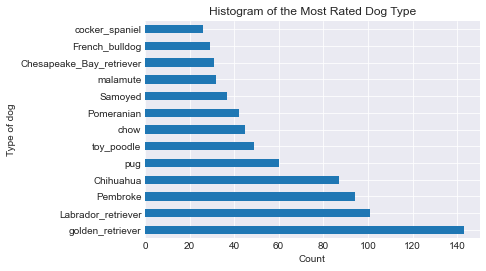

In [31]:
df_dog_type = df_twitter.groupby('prediction').filter(lambda x: len(x) >= 25)

df_dog_type['prediction'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [66]:
df_twitter.prediction.value_counts()

golden_retriever      143
Labrador_retriever    101
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
Japanese_spaniel        1
EntleBucher             1
standard_schnauzer      1
Irish_wolfhound         1
Scotch_terrier          1
Name: prediction, Length: 113, dtype: int64

second one 

In [37]:
df_dog_mean = df_twitter.groupby('prediction').mean()
df_dog_mean

,tweet_id,rating_numerator,rating_denominator,rating,year,month,day,prediction_conf,favorite_count,retweet_count,followers_count
prediction,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,8.000000,2016.500000,6.000000,16.000000,0.513621,10977.000000,3080.500000,8.848182e+06
Airedale,7.184489e+17,9.833333,10.0,9.833333,2015.583333,8.750000,15.916667,0.583771,4760.583333,1201.250000,8.848206e+06
American_Staffordshire_terrier,7.545525e+17,10.133333,10.0,10.133333,2016.133333,5.400000,15.866667,0.518511,7615.200000,1774.466667,8.848196e+06
Appenzeller,7.939334e+17,11.000000,10.0,11.000000,2016.500000,4.500000,18.500000,0.503665,6606.500000,1241.000000,8.848187e+06
Australian_terrier,7.785921e+17,11.500000,10.0,11.500000,2016.500000,3.500000,7.000000,0.307584,10066.000000,2685.000000,8.848190e+06
...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,7.197800e+17,11.000000,10.0,11.000000,2015.693878,7.612245,13.653061,0.472702,5832.244898,1909.877551,8.848206e+06
toy_terrier,7.166375e+17,10.333333,10.0,10.333333,2015.333333,11.333333,23.333333,0.321651,2862.666667,716.666667,8.848209e+06
vizsla,7.474321e+17,10.846154,10.0,10.846154,2015.769231,9.076923,17.769231,0.661060,6753.307692,1716.153846,8.848199e+06


In [38]:
df_dog_sorted = df_dog_mean['rating'].sort_values()
df_dog_sorted

prediction
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
briard                         12.333333
Irish_setter                   12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [68]:
df_twitter.loc[df_twitter.prediction == 'Japanese_spaniel']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction,prediction_conf,favorite_count,retweet_count,followers_count,source,retweet_status
870,677301033169788928,This is Juckson. He's totally on his way to a ...,5.0,10.0,Juckson,None,5.0,2015,12,17,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,Japanese_spaniel,0.661178,1197.0,390.0,8848214.0,Twitter for iPhone,Original Tweet


- the most dog have a bad rating is japanese spaniel and the best ratings on Bouvier des Flandres

third one

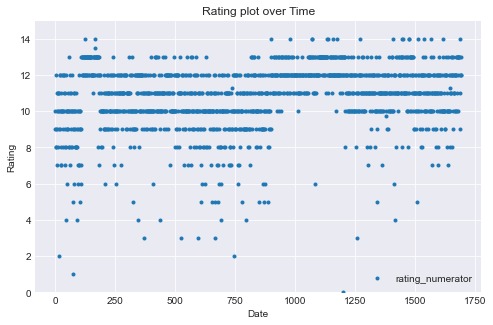

In [65]:
#there are outliers so i decide to ignor then and scaling (Brent has all the right to get mad)
df_twitter.plot(y ='rating_numerator', style = '.',ylim=[0,15], alpha = 1, figsize=(8,5))
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
fig.savefig('rating.png',bbox_inches='tight');

- The page start with small rating than they adopt the system of rating numerator more than the denominator


fourth one

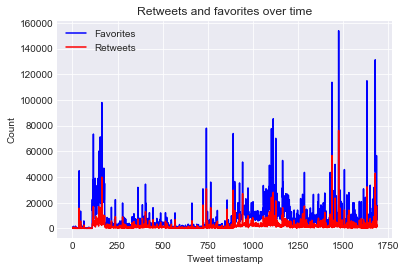

In [12]:
df_twitter['favorite_count'].plot(color = 'blue', label='Favorites')
df_twitter['retweet_count'].plot(color = 'red', label='Retweets')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()
fig.savefig('retweet_fav_plot.png',bbox_inches='tight');

fifith one

In [60]:
df_dog_type_count = df_twitter.groupby('prediction').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction_conf,favorite_count,retweet_count,followers_count,source,retweet_status
prediction,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [61]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

prediction
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.133333
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.000000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [62]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
prediction,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,15,10.133333
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,49,11.000000
toy_terrier,3,10.333333
vizsla,13,10.846154


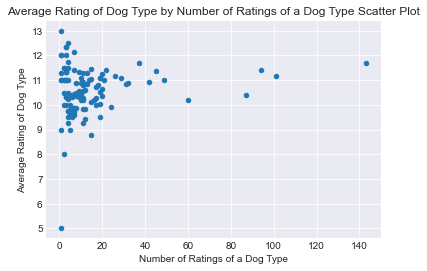

In [63]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

sixth one

In [95]:
df_dogs = df_twitter.groupby('prediction', as_index=False).sum()
df_dogs

,prediction,tweet_id,rating_numerator,rating_denominator,rating,year,month,day,prediction_conf,favorite_count,retweet_count,followers_count
0,Afghan_hound,1.619200e+18,16.0,20.0,16.0,4033.0,12.0,32.0,1.027241,21954.0,6161.0,17696364.0
1,Airedale,8.621387e+18,118.0,120.0,118.0,24187.0,105.0,191.0,7.005256,57127.0,14415.0,106178474.0
2,American_Staffordshire_terrier,1.131829e+19,152.0,150.0,152.0,30242.0,81.0,238.0,7.777661,114228.0,26617.0,132722947.0
3,Appenzeller,1.587867e+18,22.0,20.0,22.0,4033.0,9.0,37.0,1.007331,13213.0,2482.0,17696374.0
4,Australian_terrier,1.557184e+18,23.0,20.0,23.0,4033.0,7.0,14.0,0.615167,20132.0,5370.0,17696380.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,toy_poodle,3.526922e+19,539.0,490.0,539.0,98769.0,373.0,669.0,23.162416,285780.0,93584.0,433562095.0
109,toy_terrier,2.149913e+18,31.0,30.0,31.0,6046.0,34.0,70.0,0.964952,8588.0,2150.0,26544627.0
110,vizsla,9.716618e+18,141.0,130.0,141.0,26205.0,118.0,231.0,8.593779,87793.0,22310.0,115026582.0
111,whippet,8.167395e+18,112.0,110.0,112.0,22175.0,76.0,214.0,5.012110,146622.0,48496.0,97330849.0


In [112]:
df2 = pd.DataFrame()
df2['dog'] = df_dogs.prediction
df2['retweet'] = df_dogs.retweet_count
df2.sort_values(by='retweet',ascending=False,inplace=True)
df2

,dog,retweet
89,golden_retriever,412142.0
37,Labrador_retriever,290455.0
49,Pembroke,237828.0
16,Chihuahua,147997.0
55,Samoyed,128788.0
...,...,...
12,Brabancon_griffon,750.0
34,Irish_wolfhound,702.0
21,EntleBucher,600.0
90,groenendael,479.0


In [114]:
df_twitter.loc[df_twitter.prediction == 'golden_retriever'].sort_values(by='retweet_count')

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,rating,year,month,day,jpg_url,prediction,prediction_conf,favorite_count,retweet_count,followers_count,source,retweet_status
29,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,12.000000,2015,11,18,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,175.0,45.0,8848222.0,Twitter for iPhone,Original Tweet
38,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,11.000000,2015,11,19,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,240.0,55.0,8848222.0,Twitter for iPhone,Original Tweet
630,669327207240699904,Just got home from college. Dis my dog. She do...,13.0,10.0,None,None,13.000000,2015,11,25,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,golden_retriever,0.919584,545.0,113.0,8848225.0,Twitter for iPhone,Original Tweet
103,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,a,None,9.000000,2015,11,16,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.007959,266.0,122.0,8848222.0,Twitter for iPhone,Original Tweet
54,668286279830867968,Meet Rusty. Rusty's dreaming of a world where ...,11.0,10.0,Rusty,None,11.000000,2015,11,22,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,golden_retriever,0.215944,476.0,127.0,8848224.0,Twitter for iPhone,Original Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,846514051647705089,This is Barney. He's an elder doggo. Hitches a...,13.0,10.0,Barney,doggo,13.000000,2017,3,28,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,golden_retriever,0.650003,43587.0,11172.0,8848175.0,Twitter for iPhone,Original Tweet
1400,788908386943430656,"This is Lucy. She destroyed not one, but two r...",11.0,10.0,Lucy,None,11.000000,2016,10,20,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,golden_retriever,0.034090,27576.0,12519.0,8848184.0,Twitter for iPhone,Original Tweet
405,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0,None,None,8.181818,2016,6,8,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,34457.0,13049.0,8848202.0,Twitter for iPhone,Original Tweet
1457,795464331001561088,Elder doggo does a splash. Both 13/10 incredib...,13.0,10.0,None,doggo,13.000000,2016,11,7,https://pbs.twimg.com/ext_tw_video_thumb/79546...,golden_retriever,0.193082,49861.0,23680.0,8848183.0,Twitter for iPhone,Original Tweet
